Import the dependencies

In [2]:
import pandas as pd   #to make dataframes:more structured dataforms
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics  #to evalvate the model i.e find errors,accuracy,etc
from google.colab.data_table import DataTable
from sklearn.metrics import mean_squared_error

Data Collection & Processing

In [6]:
#loding the data from csv file to pandas dataframe
DataTable.max_columns = 30
car_csvdata = pd.read_csv('/CarPrice_Assignment.csv')

In [8]:
#Inspecting the first five rows of the dataframe
car_csvdata.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [9]:
car_csvdata.shape


(205, 26)

In [10]:
#getting more information about the dataset
car_csvdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [11]:
# checking the number of missing values
car_csvdata.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [12]:
# checking the distribution of categorical data(which are not numbers where here dtype='object')
print(car_csvdata.fueltype.value_counts())
print(car_csvdata.aspiration.value_counts())
print(car_csvdata.doornumber.value_counts())
print(car_csvdata.carbody.value_counts())
print(car_csvdata.drivewheel.value_counts())
print(car_csvdata.enginelocation.value_counts())
print(car_csvdata.enginetype.value_counts())
print(car_csvdata.cylindernumber.value_counts())
print(car_csvdata.fuelsystem.value_counts())


gas       185
diesel     20
Name: fueltype, dtype: int64
std      168
turbo     37
Name: aspiration, dtype: int64
four    115
two      90
Name: doornumber, dtype: int64
sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: carbody, dtype: int64
fwd    120
rwd     76
4wd      9
Name: drivewheel, dtype: int64
front    202
rear       3
Name: enginelocation, dtype: int64
ohc      148
ohcf      15
ohcv      13
dohc      12
l         12
rotor      4
dohcv      1
Name: enginetype, dtype: int64
four      159
six        24
five       11
eight       5
two         4
three       1
twelve      1
Name: cylindernumber, dtype: int64
mpfi    94
2bbl    66
idi     20
1bbl    11
spdi     9
4bbl     3
mfi      1
spfi     1
Name: fuelsystem, dtype: int64


Encoding the Categorical Data

In [13]:
#encoding is done , which is converting the string to numbers beacuse computer understands
#numbers easily than text
#Encoding the "Fuel_Type Column"
car_csvdata.replace({'fueltype':{'gas':0,'diesel':1}},inplace=True)

#Encoding the "Aspiration Column"
car_csvdata.replace({'aspiration':{'std':0,'turbo':1}},inplace=True)

#Encoding the "DoorNo Column"
car_csvdata.replace({'doornumber':{'four':4,'two':2}},inplace=True)

#Encoding the "Carbody Column"
car_csvdata.replace({'carbody':{'sedan':0,'hatchback':1,'wagon':2,'hardtop':3,'convertible':4}},inplace=True)

#Encoding the "DriveWheel Column"
car_csvdata.replace({'drivewheel':{'fwd':0,'rwd':1,'4wd':2}},inplace=True)

#Encoding the "Engine Location Column"
car_csvdata.replace({'enginelocation':{'front':0,'rear':1,}},inplace=True)

#Encoding the "Engine Type Column"
car_csvdata.replace({'enginetype':{'ohc':0,'ohcf':1,'ohcv':2,'dohc':3,'l':4,'rotor':5,'dohcv':6}},inplace=True)

#Encoding the "Cylinder Number"
car_csvdata.replace({'cylindernumber':{'four':4,'six':6,'five':5,'eight':8,'two':2,'three':3,'twelve':12}},inplace=True)

#Encoding the "Fuel Systemr"
car_csvdata.replace({'fuelsystem':{'mpfi':0,'2bbl':1,'idi':2,'1bbl':2,'spdi':3,'4bbl':4,'mfi':5,'spfi':5}},inplace=True)

In [14]:
car_csvdata.head()
#now except the car name everything is in numbers

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,0,0,2,4,1,0,88.6,...,130,0,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,0,0,2,4,1,0,88.6,...,130,0,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,0,0,2,1,1,0,94.5,...,152,0,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,0,0,4,0,0,0,99.8,...,109,0,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,0,0,4,0,2,0,99.4,...,136,0,3.19,3.40,8.0,115,5500,18,22,17450.0


Data Cleaning

In [15]:
car_csvdata.CarName.unique()

array(['alfa-romero giulia', 'alfa-romero stelvio',
       'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls',
       'audi fox', 'audi 5000', 'audi 4000', 'audi 5000s (diesel)',
       'bmw 320i', 'bmw x1', 'bmw x3', 'bmw z4', 'bmw x4', 'bmw x5',
       'chevrolet impala', 'chevrolet monte carlo', 'chevrolet vega 2300',
       'dodge rampage', 'dodge challenger se', 'dodge d200',
       'dodge monaco (sw)', 'dodge colt hardtop', 'dodge colt (sw)',
       'dodge coronet custom', 'dodge dart custom',
       'dodge coronet custom (sw)', 'honda civic', 'honda civic cvcc',
       'honda accord cvcc', 'honda accord lx', 'honda civic 1500 gl',
       'honda accord', 'honda civic 1300', 'honda prelude',
       'honda civic (auto)', 'isuzu MU-X', 'isuzu D-Max ',
       'isuzu D-Max V-Cross', 'jaguar xj', 'jaguar xf', 'jaguar xk',
       'maxda rx3', 'maxda glc deluxe', 'mazda rx2 coupe', 'mazda rx-4',
       'mazda glc deluxe', 'mazda 626', 'mazda glc', 'mazda rx-7 gs',
       'mazda glc 

In [16]:
CompanyName = car_csvdata['CarName'].apply(lambda x : x.split(' ')[0])

In [17]:
car_csvdata.insert(3,"CompanyName",CompanyName)
car_csvdata.drop(['CarName'],axis=1,inplace=True)
car_csvdata.head()

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero,0,0,2,4,1,0,88.6,...,130,0,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero,0,0,2,4,1,0,88.6,...,130,0,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero,0,0,2,1,1,0,94.5,...,152,0,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi,0,0,4,0,0,0,99.8,...,109,0,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi,0,0,4,0,2,0,99.4,...,136,0,3.19,3.40,8.0,115,5500,18,22,17450.0


In [18]:
car_csvdata.CompanyName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [19]:
car_csvdata.CompanyName = car_csvdata.CompanyName.str.lower()
car_csvdata.CompanyName.replace('maxda','mazda',inplace=True)
car_csvdata.CompanyName.replace('porcshce','porsche',inplace=True)
car_csvdata.CompanyName.replace('toyouta','toyota',inplace=True)
car_csvdata.CompanyName.replace('vokswagen','volkswagen',inplace=True)
car_csvdata.CompanyName.replace('vw','volkswagen',inplace=True)
car_csvdata.CompanyName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

Spliiting the datasets into training and test data

In [20]:
X=car_csvdata.drop(['CompanyName','price','car_ID'],axis=1)  #axis=1,when dropping column
Y=car_csvdata['price']                                       #axis=0,when dropping row

In [ ]:
print(X)

     symboling  fueltype  aspiration  doornumber  carbody  drivewheel  \
0            3         0           0           2        4           1   
1            3         0           0           2        4           1   
2            1         0           0           2        1           1   
3            2         0           0           4        0           0   
4            2         0           0           4        0           2   
..         ...       ...         ...         ...      ...         ...   
200         -1         0           0           4        0           1   
201         -1         0           1           4        0           1   
202         -1         0           0           4        0           1   
203         -1         1           1           4        0           1   
204         -1         0           1           4        0           1   

     enginelocation  wheelbase  carlength  carwidth  ...  cylindernumber  \
0                 0       88.6      168.8      

In [21]:
print(Y)

0      13495.0
1      16500.0
2      16500.0
3      13950.0
4      17450.0
        ...   
200    16845.0
201    19045.0
202    21485.0
203    22470.0
204    22625.0
Name: price, Length: 205, dtype: float64


In [23]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.1,random_state=3)  #0.1->10% for testing 90% for training dataset

Model Training:Linear Regression

In [24]:
#loading the linear regression model
lin_reg_model = LinearRegression()

In [25]:
lin_reg_model.fit(x_train,y_train)

LinearRegression()

Model Evaulation

In [26]:
#Predicting the car price using Training data
training_data_prediction = lin_reg_model.predict(x_train)

In [27]:
#R squared Error
error_score = metrics.r2_score(y_train,training_data_prediction)
print("R squared Error:",error_score)

R squared Error: 0.8742579761530418


Visualizing the actual price & predicted price for training data & test data

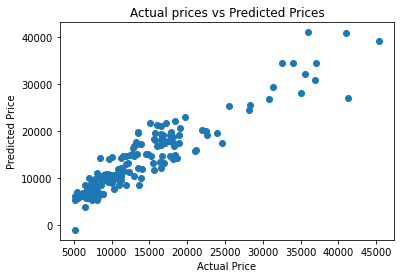

In [ ]:
plt.scatter(y_train,training_data_prediction)
plt.xlabel("Actual Price")     #y_train
plt.ylabel("Predicted Price")  #predicted price
plt.title("Actual prices vs Predicted Prices")
plt.show()

In [28]:
#Predicting the car price using test data
test_data_prediction = lin_reg_model.predict(x_test)

In [ ]:
#R squared Error
error_score = metrics.r2_score(y_test,test_data_prediction)
print("R squared Error:",error_score)

R squared Error: 0.946302545419966


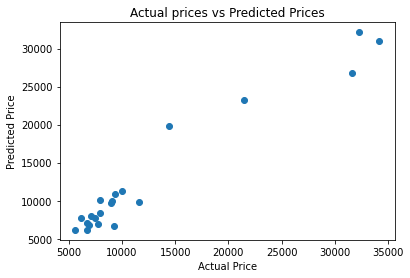

In [ ]:
plt.scatter(PriceTestData,test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual prices vs Predicted Prices")
plt.show()

**LASSO REGRESSION**

In [29]:
#loading the linear regression model
lass_reg_model = Lasso()

In [31]:
lass_reg_model.fit(x_train,y_train)

Lasso()

Model Evaulation

In [32]:
#Predicting the car price using Training data
training_data_prediction = lass_reg_model.predict(x_train)

In [34]:
#R squared Error
error_score = metrics.r2_score(y_train,training_data_prediction)
print("R squared Error:",error_score)

R squared Error: 0.8742381614811159


Visualizing the actual price & predicted price for training data & test data

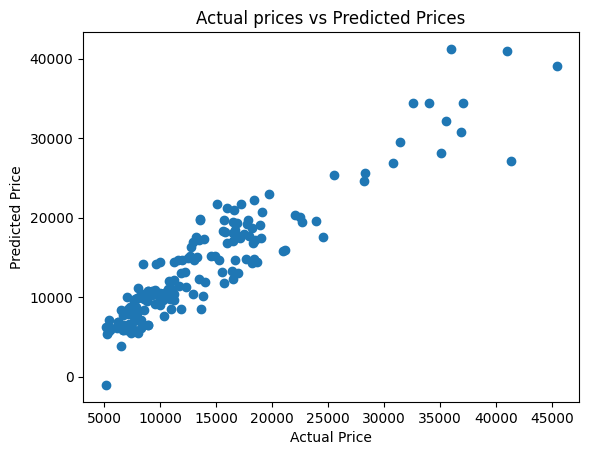

In [35]:
plt.scatter(y_train,training_data_prediction)
plt.xlabel("Actual Price")     #y_train
plt.ylabel("Predicted Price")  #predicted price
plt.title("Actual prices vs Predicted Prices")
plt.show()

In [36]:
#Predicting the car price using test data
test_data_prediction = lass_reg_model.predict(x_test)

In [37]:
#R squared Error
error_score = metrics.r2_score(y_test,test_data_prediction)
print("R squared Error:",error_score)

R squared Error: 0.9457050782243774


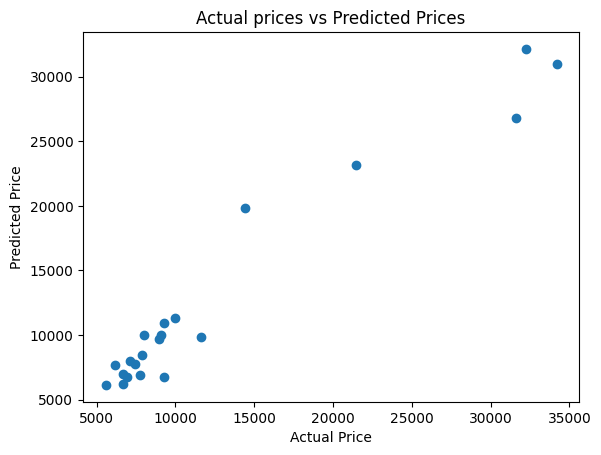

In [38]:
plt.scatter(y_test,test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual prices vs Predicted Prices")
plt.show()